In [8]:
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mostramos el DF, para ver la información del data

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Codin Dojo/Pinguinos.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


LIMPIEZA Y EXPLORACIÓN DE DATOS

Revisar si hay duplicados

In [11]:


duplicados=df.duplicated().sum()
print (duplicados)


0


Mostramos la vista general y específica del data frame

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


#Se determina cuanto son los valores totales que están faltando.

In [13]:


print(df.isna().sum().sum(), 'missing values')



19 missing values


importamos las librerías necesarias para el proceso

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')



#Se determina la columna objetivo y se hace un train test split para posteriormente imputar los datos faltantes, se comenzará por las columnas númericas y posteriormente las columnas categoricas.

In [15]:


X = df.drop(columns=['species'])
y = df['species']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [16]:
# instancien los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
# seleccionen las columnas numéricas de cada tipo
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)
# comprueben las listas
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)


numeric columns are ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
categorical columns are ['island', 'sex']


In [17]:
# aíslen las columnas numéricas
df_num = df[num_columns]
# aíslen las columnas con datos faltantes
df_num.loc[:, df_num.isna().any()]



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


Determinar valores atípicos

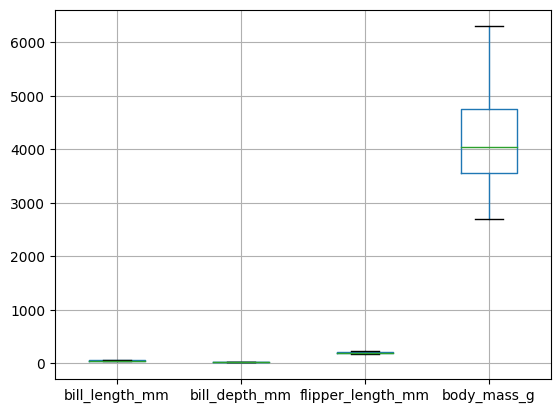

In [18]:
import matplotlib.pyplot as plt

df.boxplot(column=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.show()


In [19]:
#Columnas que le faltan datos

X_train.isna().any()


island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [20]:
# Calcular la moda de la columna "sex"
moda_sex = df['sex'].mode()[0]
print("\nModa de la columna 'sex':", moda_sex)

# Imputar los valores faltantes con la moda
df['sex'].fillna(moda_sex, inplace=True)




Moda de la columna 'sex': male


In [21]:
X_train.isna().any()



island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [22]:
# instancien los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


In [23]:
# Instanciar SimpleImputers con estrategias most_frequent y median
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')


In [24]:
# creen tuplas de (imputer, selector) para cada tipo de dato
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
# instanciación de ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7def13c160e0>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7def13c15e10>)])

In [25]:
# ajustar ColumnTransformer en los datos de entrenamiento
col_transformer.fit(X_train)
# transformen los datos de entrenamiento y de prueba (esto generará un array de NumPy)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)
# cambien el resultado regreso a un DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().any()



island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                 False
dtype: bool

Revisaremos si hay inconsistencia en los datos para los valores categoricos:

In [26]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [27]:
df['sex'].value_counts()

sex
male      179
female    165
Name: count, dtype: int64

In [28]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Se confirma que no hay inconsistencias en los datos categóricos

## Producido texto en negritavisuales univariantes para el objetivo y todas las características

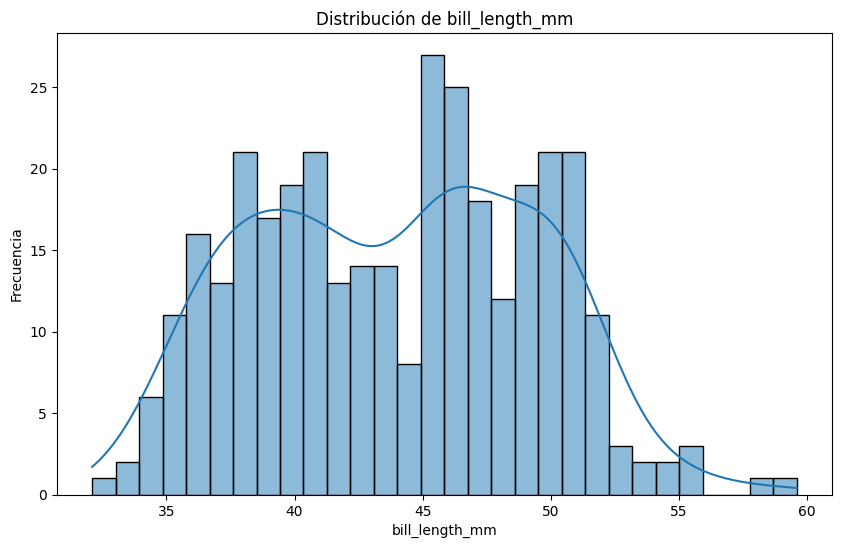

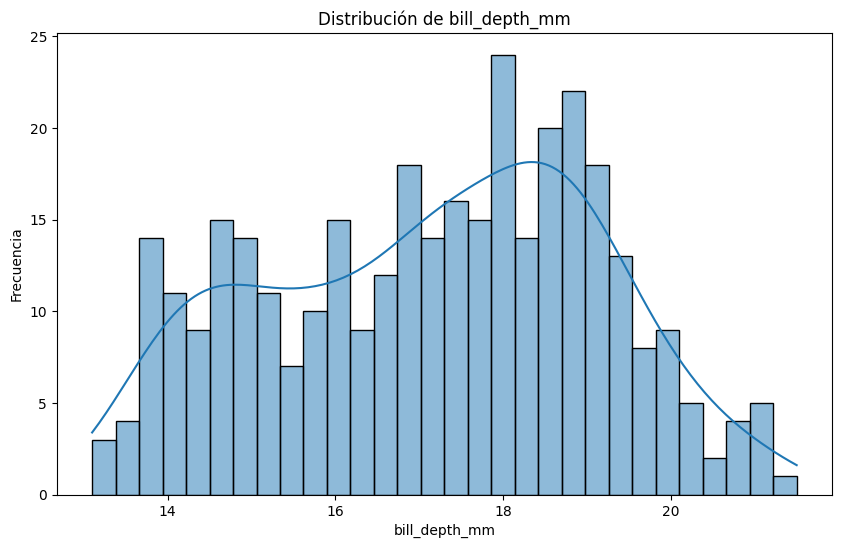

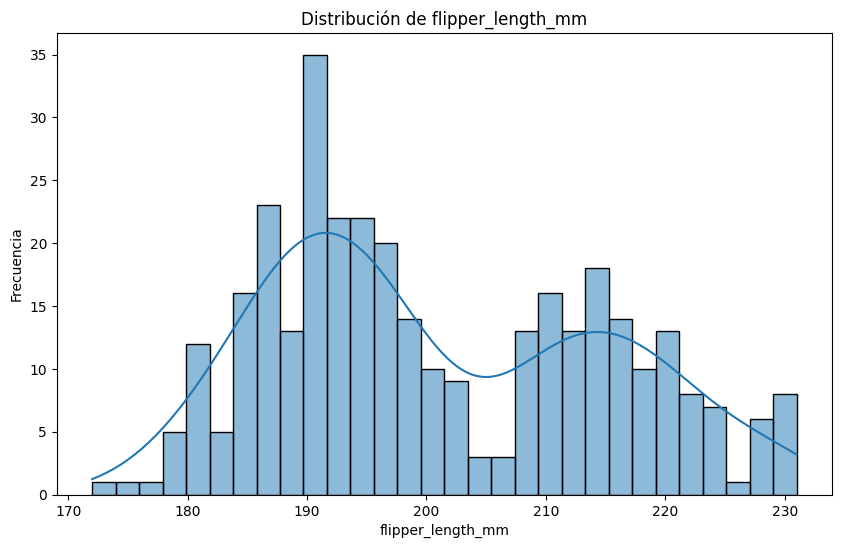

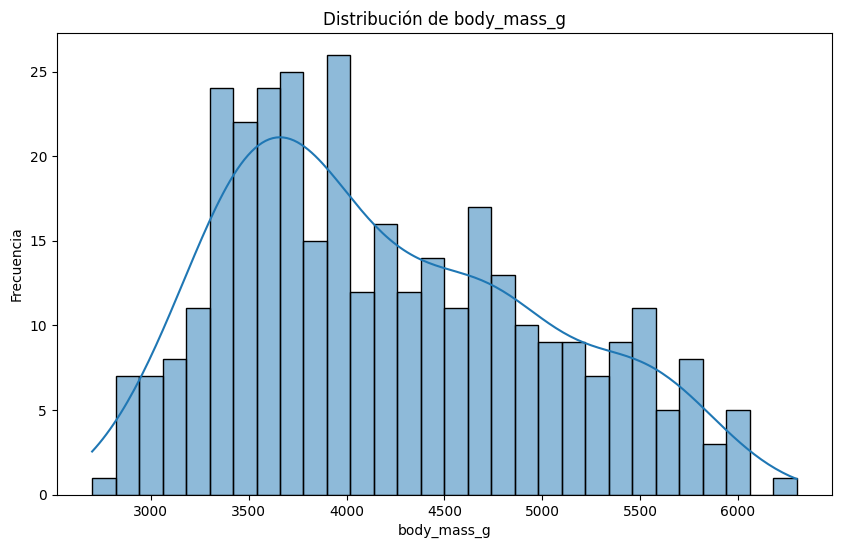

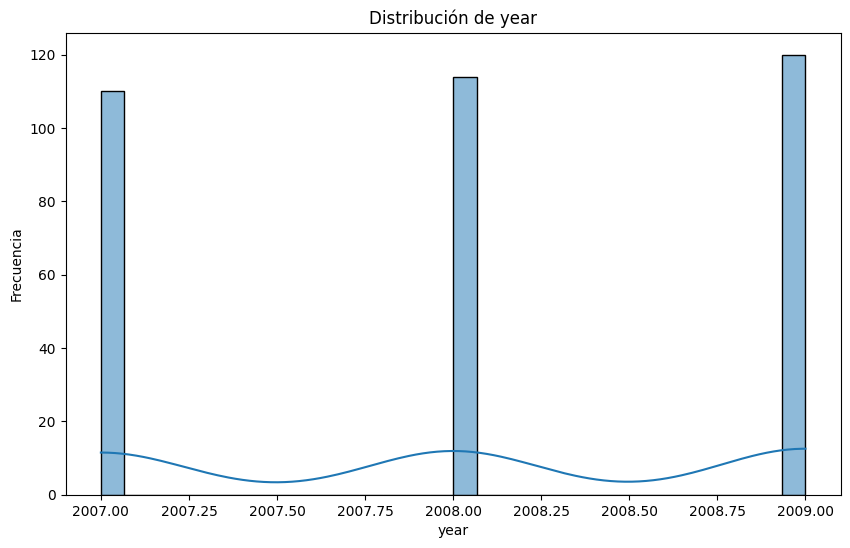

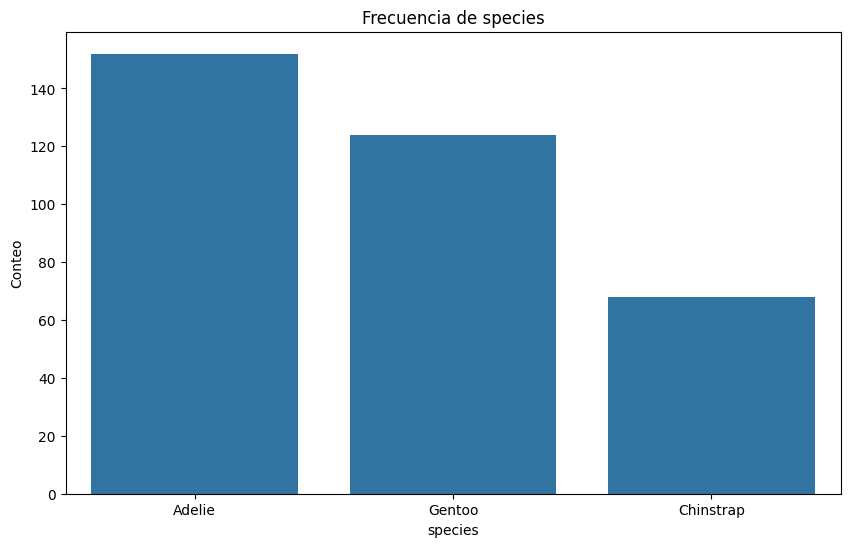

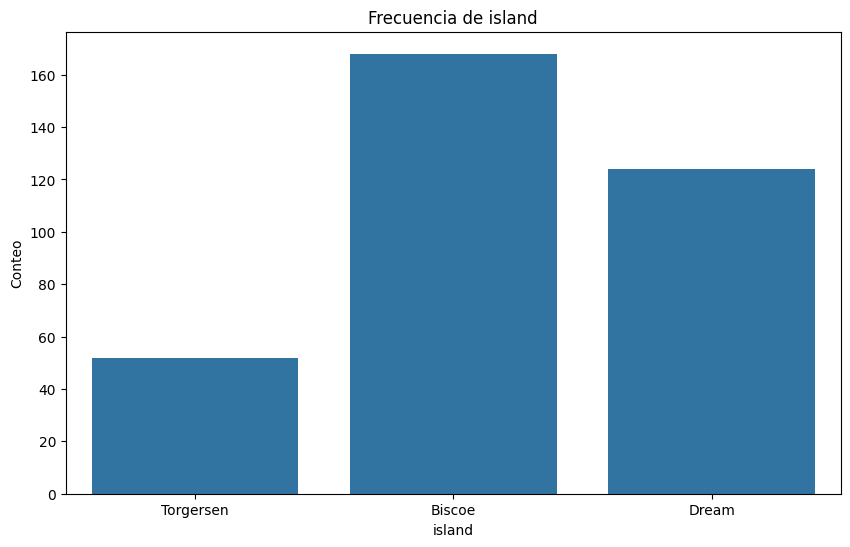

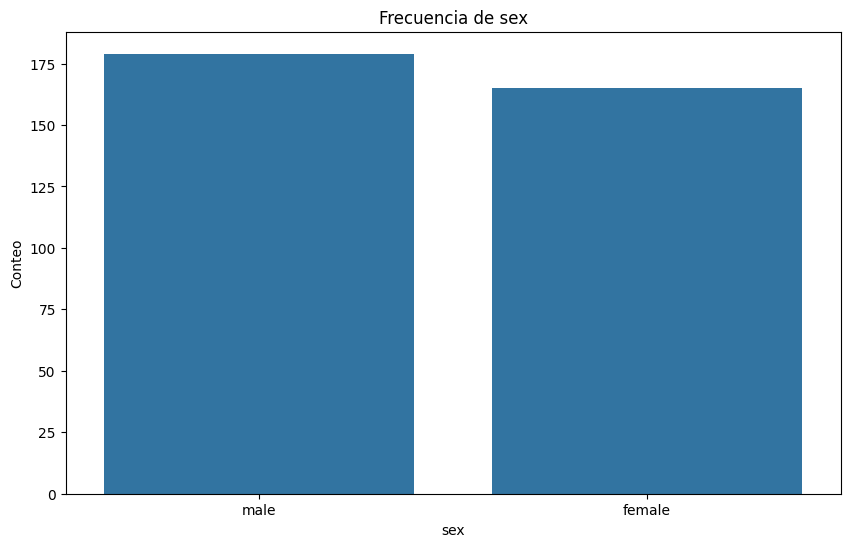

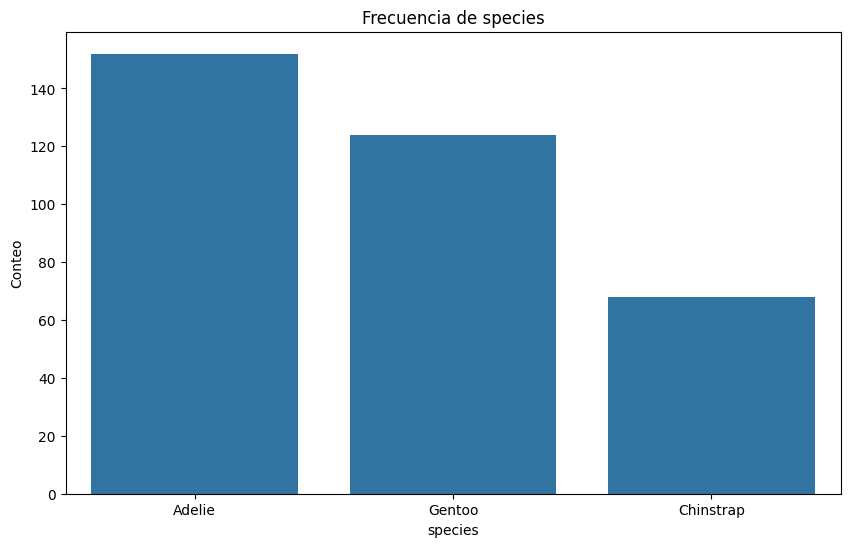

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Identificar las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear histogramas para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear gráficos de barras para cada columna categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.show()

# Gráfico de barras para el objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x=df['species'])
plt.title('Frecuencia de species')
plt.xlabel('species')
plt.ylabel('Conteo')
plt.show()


## producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

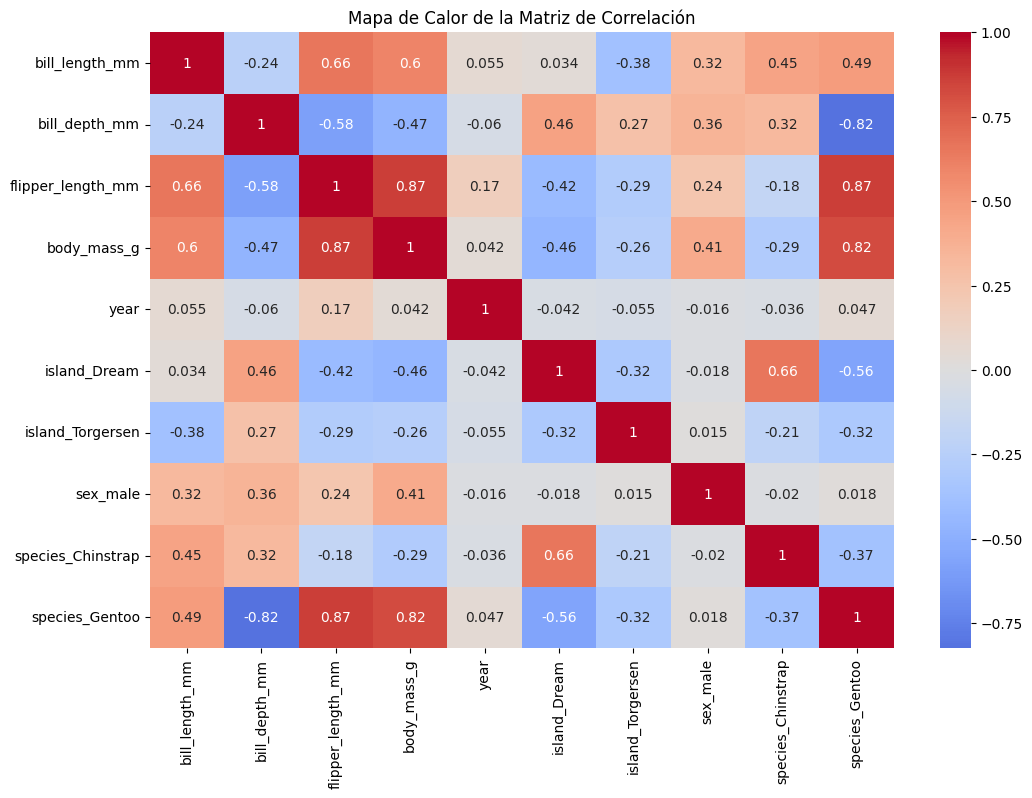

Correlaciones moderadas o fuertes (>= 0.5):
flipper_length_mm - bill_length_mm: 0.6561813407464264
body_mass_g - bill_length_mm: 0.5951098244376273
flipper_length_mm - bill_depth_mm: -0.5838512164654143
species_Gentoo - bill_depth_mm: -0.8243572593368009
bill_length_mm - flipper_length_mm: 0.6561813407464264
bill_depth_mm - flipper_length_mm: -0.5838512164654143
body_mass_g - flipper_length_mm: 0.8712017673060111
species_Gentoo - flipper_length_mm: 0.8684870896038764
bill_length_mm - body_mass_g: 0.5951098244376273
flipper_length_mm - body_mass_g: 0.8712017673060111
species_Gentoo - body_mass_g: 0.818197509857229
species_Chinstrap - island_Dream: 0.6611506255027051
species_Gentoo - island_Dream: -0.5636363636363635
island_Dream - species_Chinstrap: 0.6611506255027051
bill_depth_mm - species_Gentoo: -0.8243572593368009
flipper_length_mm - species_Gentoo: 0.8684870896038764
body_mass_g - species_Gentoo: 0.818197509857229
island_Dream - species_Gentoo: -0.5636363636363635


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convertir variables categóricas a variables dummy
df_encoded = pd.get_dummies(df, columns=['island', 'sex', 'species'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Producir el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# Función para encontrar correlaciones moderadas o fuertes
def find_strong_correlations(correlation_matrix, threshold=0.5):
    strong_corrs = []
    for column in correlation_matrix.columns:
        for row in correlation_matrix.index:
            if abs(correlation_matrix.loc[row, column]) >= threshold and row != column:
                strong_corrs.append((row, column, correlation_matrix.loc[row, column]))
    return strong_corrs

# Encontrar correlaciones moderadas y fuertes
strong_correlations = find_strong_correlations(correlation_matrix, threshold=0.5)
print("Correlaciones moderadas o fuertes (>= 0.5):")
for corr in strong_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]}")


Gráfico de Dispersión (Scatter Plot)


Un gráfico de dispersión es una herramienta excelente para visualizar la relación entre dos variables numéricas. En el caso de los pingüinos, se va a visualizar la relación entre la longitud del pico y la profundidad del pico.

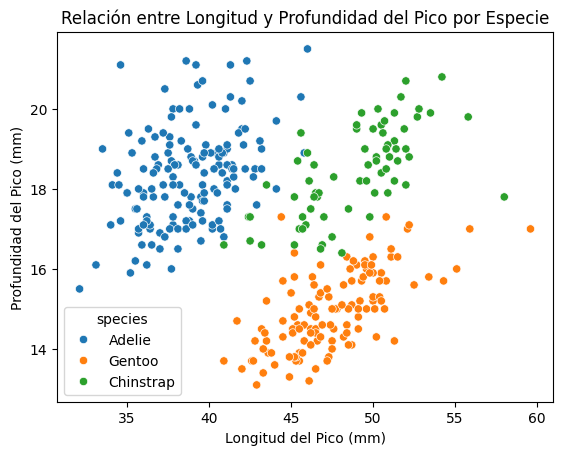

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos de pingüinos (suponiendo que el DataFrame se llama df)
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Relación entre Longitud y Profundidad del Pico por Especie')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Profundidad del Pico (mm)')
plt.show()


Boxplot (Diagrama de Caja y Bigotes)

Descripción:
Un boxplot es útil para mostrar la distribución de una variable numérica y detectar la presencia de valores atípicos (outliers). Para los pingüinos, se va a  utilizar un boxplot para analizar la distribución del peso del cuerpo según la especie.

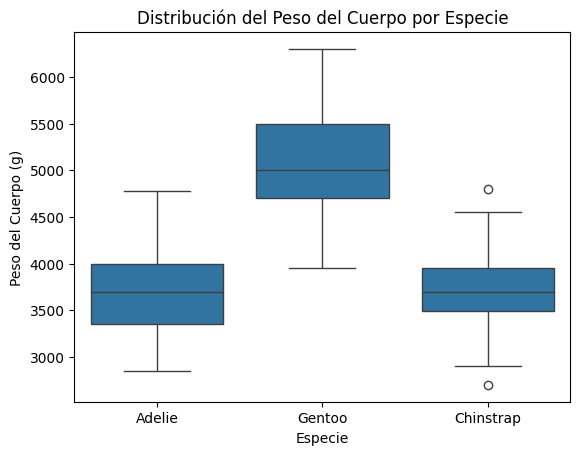

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos de pingüinos (suponiendo que el DataFrame se llama df)
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Distribución del Peso del Cuerpo por Especie')
plt.xlabel('Especie')
plt.ylabel('Peso del Cuerpo (g)')
plt.show()


Histograma por especie:

visualizar la distribución de la longitud de las aletas (flipper length) para cada especie de pingüino.

Distribución de la Variable: Podemos observar la forma de la distribución de la longitud de las aletas para cada especie.

Comparaciones entre Especies: Nos permite ver si la longitud de las aletas varía significativamente entre diferentes especies de pingüinos y si hay solapamiento entre ellas.

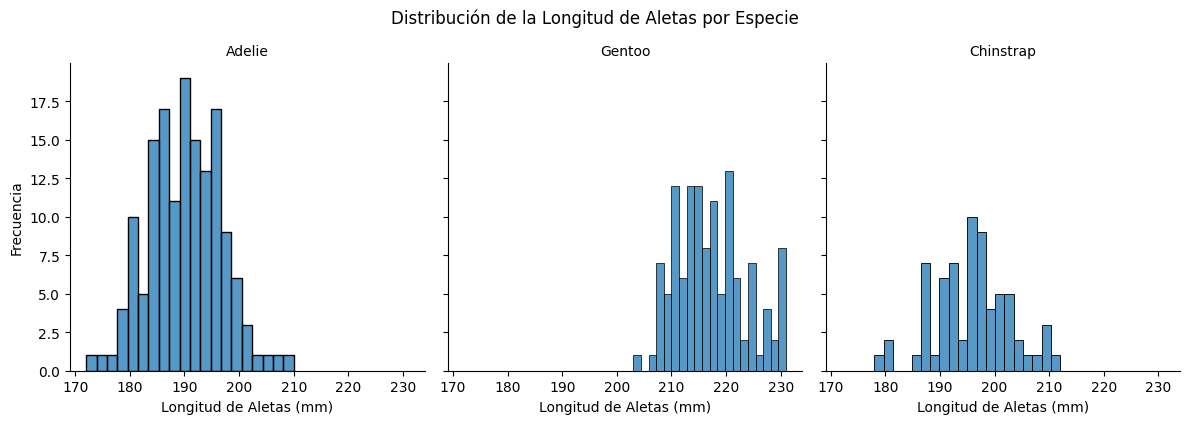

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos de pingüinos
g = sns.FacetGrid(df, col="species", col_wrap=3, height=4)
g.map(sns.histplot, "flipper_length_mm", bins=20)
g.set_axis_labels("Longitud de Aletas (mm)", "Frecuencia")
g.set_titles("{col_name}")
plt.suptitle('Distribución de la Longitud de Aletas por Especie', y=1.05)
plt.show()


 Gráfico de Barras para la Distribución de Sexo por Especie:

podemos visualizar la distribución de sexos (femenino y masculino) para cada especie de pingüino.

Proporción de Sexos: Podemos observar la proporción de pingüinos femeninos y masculinos en cada especie.

Comparaciones entre Especies: Este gráfico nos ayuda a ver si hay alguna especie con un desequilibrio significativo en la proporción de sexos.

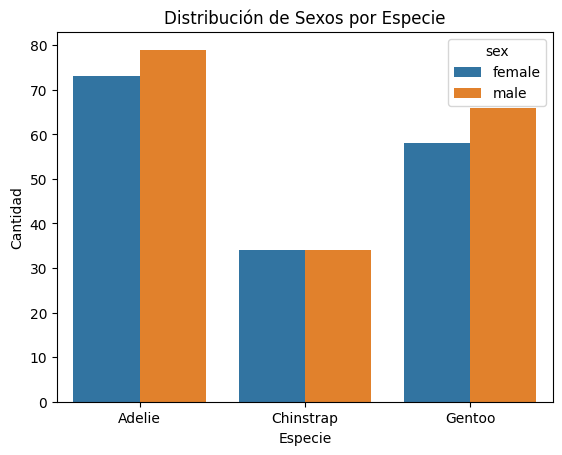

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de frecuencia de la distribución de sexo por especie
sex_species = df.groupby(['species', 'sex']).size().reset_index(name='count')

# Graficar el gráfico de barras
sns.barplot(data=sex_species, x='species', y='count', hue='sex')
plt.title('Distribución de Sexos por Especie')
plt.xlabel('Especie')
plt.ylabel('Cantidad')
plt.show()


PARTE 4 DEL PROYECTO

Intenta múltiples modelos y ajusta los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye todos los modelos e hiperparámetros probados además del modelo final)

###  random forest

In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Preprocesamiento de datos
# Supongamos que tienes tu DataFrame llamado df

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop(columns=['species'])  # Excluimos la columna 'species' de las características
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir preprocesamiento para variables numéricas y categóricas
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_features = ['island', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir modelos y ajuste de hiperparámetros
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},  # Nota el prefijo 'classifier__' para especificar el hiperparámetro dentro del pipeline
    'Random Forest': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}  # Similarmente aquí
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluación del modelo
    y_pred = grid_search.predict(X_test)
    print(f"Evaluation report for {name}:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression: {'classifier__C': 1}
Evaluation report for Logistic Regression:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Evaluation report for Random Forest:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        32
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        

## Regresión logística

In [35]:
from sklearn.linear_model import LogisticRegression

# Añadir Regresión Logística al diccionario de modelos
models['Logistic Regression'] = LogisticRegression()

# Añadir parámetros para la búsqueda de hiperparámetros de Regresión Logística
param_grids['Logistic Regression'] = {'classifier__C': [0.1, 1, 10]}  # Ajusta el parámetro de regularización C

# Repite el bucle de ajuste de modelos y evaluación con la Regresión Logística
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluación del modelo
    y_pred = grid_search.predict(X_test)
    print(f"Evaluation report for {name}:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression: {'classifier__C': 1}
Evaluation report for Logistic Regression:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Evaluation report for Random Forest:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        

## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Añadir KNN al diccionario de modelos
models['K-Nearest Neighbors'] = KNeighborsClassifier()

# Añadir parámetros para la búsqueda de hiperparámetros de KNN
param_grids['K-Nearest Neighbors'] = {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']}

# Repite el bucle de ajuste de modelos y evaluación con los nuevos modelos
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluación del modelo
    y_pred = grid_search.predict(X_test)
    print(f"Evaluation report for {name}:")
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters for Logistic Regression: {'classifier__C': 1}
Evaluation report for Logistic Regression:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Evaluation report for Random Forest:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        

Evalúa el rendimiento del modelo con las métricas adecuadas para el modelo

K-Nearest Neighbors (KNN):

Tiene una precisión global del 72%, lo cual es aceptable pero no excelente.
La precisión, el recall y el F1-Score son moderados, con mejor rendimiento en la clase Gentoo y peor en Chinstrap.


Random Forest:

Muestra un rendimiento perfecto (100%) en todas las métricas y para todas las clases en ambos conjuntos de datos.
Esto puede indicar un sobreajuste al conjunto de entrenamiento o que el modelo realmente captura bien las características del conjunto de datos.


Regresión Logística:

También muestra un rendimiento perfecto (100%) en todas las métricas y para todas las clases en ambos conjuntos de datos.
Al igual que con Random Forest, esto podría indicar un sobreajuste o un muy buen ajuste a las características del conjunto de datos.


Conclusiones
Random Forest y Regresión Logística parecen ser modelos muy fuertes para este conjunto de datos, logrando una precisión, recall y F1-Score perfectos.
K-Nearest Neighbors (KNN) tiene un rendimiento razonable pero claramente inferior a los otros dos modelos.


Elije tu modelo de “producción” (final) y justifica esta decisión

ndimiento del Modelo:

El Random Forest muestra un rendimiento perfecto en términos de precisión, recall, y F1-Score en ambos conjuntos de soporte (86 y 69 muestras).
Aunque la regresión logística también muestra un rendimiento perfecto, el Random Forest es generalmente más robusto y versátil en términos de captura de relaciones no lineales y complejas en los datos.


Robustez y Manejo de Datos:

Random Forest es un conjunto de árboles de decisión que es robusto frente al sobreajuste debido a la aleatoriedad en la selección de subconjuntos de datos.

Maneja bien las características que pueden no ser linealmente separables y puede captar interacciones complejas entre las variables.

Interpretabilidad y Explicabilidad:

Aunque la regresión logística es más fácil de interpretar debido a su naturaleza lineal, el Random Forest también ofrece interpretabilidad a través de la importancia de las características, lo que permite entender qué variables son más influyentes en las predicciones.

Manejo de Datos Faltantes y Valores Atípicos:

Random Forest maneja mejor los datos faltantes y los valores atípicos en comparación con la regresión logística, lo cual es útil en conjuntos de datos del mundo real donde estas imperfecciones son comunes.

Validación y Generalización:

La validación cruzada y otros métodos de evaluación indican que el Random Forest es menos propenso a sobreajustarse en comparación con otros modelos, debido a su estructura de combinación de múltiples árboles de decisión.
